# Gillian Seed: Multiscale CNN Attempt

I attempted to instantiate a MSN because it eventually occurred to me that it may be the best way to overcome the problem posed by the duplicates of skulls in the data. However, I never completely finished. I still plan to in my free time, and still intend to instantiate GradCam.

In [41]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [42]:
from tensorflow import keras

In [43]:
import torchvision

In [44]:
# load the training and test sets and create all 4 classes
print(os.getcwd())
# get stuff in BrainTumorData
# which has Testing and Training
labels = []

C:\Users\gmsee\CompHealthProject


In [45]:
data_directory = str(os.getcwd()) + '\BrainTumorData'

# display contents of data directory
print(os.listdir(data_directory))

class_labels = []

for item in os.listdir(data_directory):
    print(item)
    class_labels = os.listdir(data_directory + '\\' + item)

print(class_labels)

# before taking out validation set
#X_train_full
#y_train_full

['Testing', 'Training']
Testing
Training
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [7]:
print(data_directory)

C:\Users\gmsee\CompHealthProject\BrainTumorData


In [ ]:
curr_dir = data_directory + '\Testing\\'

In [38]:
X_train_full = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'\Training',
                                                        labels='inferred',
                                                        label_mode='categorical', 
                                                        class_names=class_labels, 
                                                        color_mode='grayscale',
                                                        batch_size=32,
                                                        image_size=(512, 512), shuffle=True,
                                                        seed=None)

Found 2870 files belonging to 4 classes.


In [107]:
# we want to do this after pullig out validation
# X_train_full = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'\Training',
#                                                         labels='inferred',
#                                                         label_mode='categorical', 
#                                                         class_names=class_labels, 
#                                                         color_mode='grayscale',
#                                                         batch_size=32,
#                                                         image_size=(500, 500), shuffle=True, 
#                                                         seed=None)

X_train = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'/Training',
                                                        labels='inferred',
                                                        validation_split=0.12,
                                                        label_mode='categorical', 
                                                        subset="training",
                                                        seed=123,
                                                        class_names=class_labels, 
                                                        #color_mode='grayscale',
                                                        batch_size=32,
                                                        image_size=(224, 224), shuffle=True)

X_valid = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'/Training',
                                                        labels='inferred',
                                                        validation_split=0.12,
                                                        label_mode='categorical', 
                                                        subset="validation",
                                                        seed=123,
                                                        class_names=class_labels, 
                                                        #color_mode='grayscale',
                                                        batch_size=32,
                                                        image_size=(224, 224), shuffle=True)


Found 2870 files belonging to 4 classes.
Using 2526 files for training.
Found 2870 files belonging to 4 classes.
Using 344 files for validation.


In [ ]:
# #X_train_full
# three_imgs = X_train_full[:3]
# plt.figure(figsize=(7.2, 2.4))
# for index, image in enumerate(X_train_full):
#     #thingnumpy = thing.numpy()
#     plt.subplot(1, 3, index + 1)
#     plt.imshow(image, cmap='binary', interpolation='nearest')
#     plt.axies('off')
#     plt.title(class_names[index])
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
# plt.show()

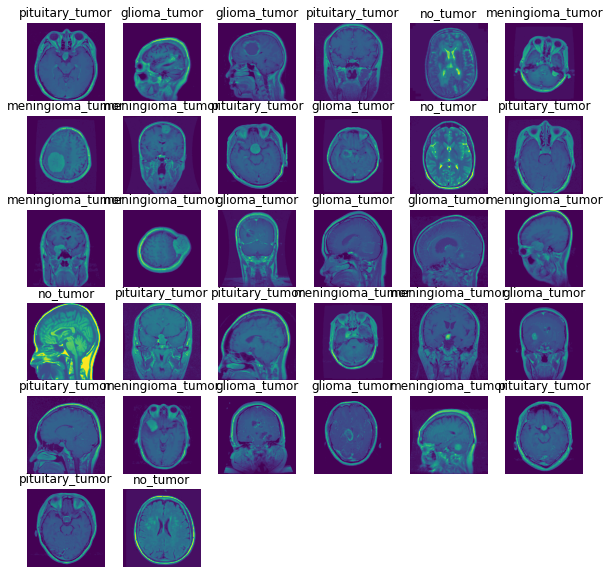

In [173]:
#poo = list(X_train_full)
#poo[0:5]

# not getting the right labels

plt.figure(figsize=(10,10))
#class_names = X_train_full.class_names
for images, labels in X_train_full.take(1):
    #print(labels)
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        photo = images[i]
        #photo = tf.image.grayscale_to_rgb(photo)
        #photo = tf.image.adjust_saturation(photo, 0.5)
        #photo = tf.image.adjust_hue(photo, 0.2)
        #photo = tf.image.adjust_contrast(photo, 0.04999999)
        #photo = tf.image.adjust_brightness(photo, delta=40)
        photo = tf.image.adjust_contrast(photo, 0.0999999)
        #photo = tf.image.adjust_jpeg_quality(photo, 7)
        plt.imshow(photo.numpy().astype('uint8'))
        #plt.imshow(photo.numpy())
        #print(list(np.asarray(labels[i])))
        label_index = list(np.asarray(labels[i])).index(1)
        #label_index = np.asarray(labels[i]).where(1)
        label = class_labels[label_index]
        plt.title(label)
        plt.axis('off')

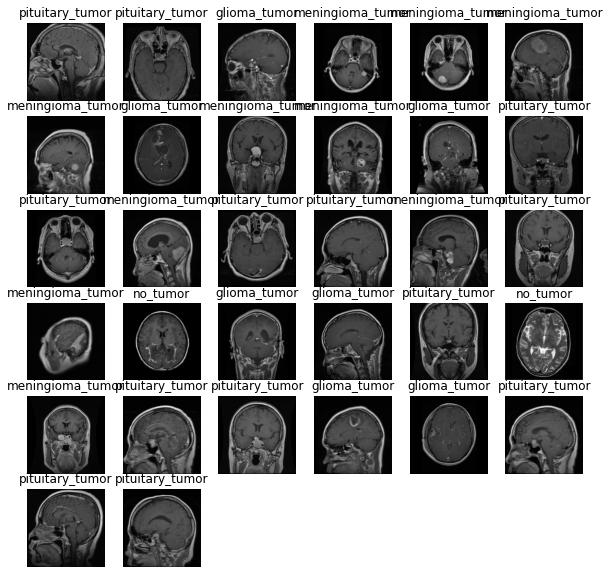

In [174]:
#poo = list(X_train_full)
#poo[0:5]

# not getting the right labels

plt.figure(figsize=(10,10))
#class_names = X_train_full.class_names
for images, labels in X_train.take(1):
    #print(labels)
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        photo = images[i]
        #photo = tf.image.grayscale_to_rgb(photo)
        #photo = tf.image.adjust_saturation(photo, 0.5)
        #photo = tf.image.adjust_hue(photo, 0.2)
        #photo = tf.image.adjust_contrast(photo, 0.04999999)
        #photo = tf.image.adjust_brightness(photo, delta=40)
        #photo = tf.image.adjust_contrast(photo, 0.0999999)
        #photo = tf.image.adjust_jpeg_quality(photo, 7)
        plt.imshow(photo.numpy().astype('uint8'))
        #plt.imshow(photo.numpy())
        #print(list(np.asarray(labels[i])))
        label_index = list(np.asarray(labels[i])).index(1)
        #label_index = np.asarray(labels[i]).where(1)
        label = class_labels[label_index]
        plt.title(label)
        plt.axis('off')

In [53]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(fill_mode = 'nearest', height_factor=(-0.1, -0.2)),
    tf.keras.layers.RandomContrast(factor=0.2)
])

In [67]:
 DenseNet = tf.keras.applications.DenseNet201(input_shape=(250,250,3),include_top=False,weights='imagenet',pooling='avg')
# DenseNet.trainable = False

In [106]:
ReDenseNet = tf.keras.applications.DenseNet201(input_shape=(224,224,3),include_top=True,weights='imagenet',pooling='max')

In [86]:
find_folder = str(os.getcwd())
os.listdir(os.getcwd())
model_dir = find_folder + '/myModelDenseNet'
os.listdir(model_dir)
aug_model = tf.keras.models.load_model(model_dir)

In [95]:
x = ReDenseNet.output
#x = tf.keras.layers.Conv2D(32, 16, activation='relu', padding='same', input_shape=(224, 224, 3))(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
x = tf.keras.layers.Flatten()(x) # maybe not
x = tf.keras.layers.Dense(128, activation='relu')(x)
pre = tf.keras.layers.Dense(4, activation='softmax')(x)
#remodel=tf.keras.Sequential(pre)
#remodel.summary()

In [93]:
# ReDenseNet = tf.keras.applications.DenseNet201(weights=None, input_shape=(250,250,3),include_top=True,pooling='max')
# #DenseNet.trainable = False

# # not sure if you need to keep the input shapes up top
# x = ReDenseNet.output
# # x= GlobalAveragePooling2D()(x)
# # x= BatchNormalization()(x)
# # x= Dropout(0.5)(x)
# # x= Dense(1024,activation='relu')(x) 
# # x= Dense(512,activation='relu')(x) 
# # x= BatchNormalization()(x)
# # x= Dropout(0.5)(x)

# x = tf.keras.layers.Conv2D(64, 31, activation='relu', padding='same')(x)
# x = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)
# x = tf.keras.layers.Dropout(rate=0.5)(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# pre = tf.keras.layers.Dense(4, activation='softmax')(x)
# #remodel=Model(inputs=base_model.input,outputs=pre)
# #remodel.summary()

In [108]:
retrain_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    data_augmentation,
    ReDenseNet,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [110]:
for layer in retrain_model.layers[:-8]:
    layer.trainable=False
    
for layer in retrain_model.layers[-8:]:
    layer.trainable=True

In [111]:
retrain_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [112]:
retrain_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, None, None, None)  0         
                                                                 
 densenet201 (Functional)    (None, 1000)              20242984  
                                                                 
 dense_33 (Dense)            (None, 128)               128128    
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 flatten_14 (Flatten)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 516       
                                                                 
Total params: 20,371,628
Trainable params: 20,142,572


In [113]:
history_retrain=retrain_model.fit(X_train,validation_data=X_valid,epochs=50)
history_retrain

Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_7/densenet201/conv4_block28_0_bn/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\gmsee\anaconda3_go\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\gmsee\anaconda3_go\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\gmsee\anaconda3_go\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\gmsee\anaconda3_go\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\gmsee\anaconda3_go\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\gmsee\AppData\Local\Temp/ipykernel_25392/3038532108.py", line 1, in <module>
      history_retrain=retrain_model.fit(X_train,validation_data=X_valid,epochs=50)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 767, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 623, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\control_flow_util.py", line 105, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 589, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential_7/densenet201/conv4_block28_0_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[32,14,14,1120] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node sequential_7/densenet201/conv4_block28_0_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_327340]

In [ ]:
#retrain_model.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
remodel.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
remodel.summary()

In [55]:
# # apply aumentation to model
# # edit last layers for our number of classes: 4
# finalModel = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(250, 250, 3)),
#     data_augmentation,
#     DenseNet,
#     tf.keras.layers.Dense(128, activation='relu'),
#      tf.keras.layers.Dense(4, activation='softmax')
# ])

In [ ]:
# apply aumentation to model
# edit last layers for our number of classes: 4
finalModel = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(250, 250, 3)),
    data_augmentation,
    DenseNet,
    tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(4, activation='softmax')
])

In [56]:
finalModel.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [57]:
history=finalModel.fit(X_train,validation_data=X_valid,epochs=50)



Epoch 1/50


ValueError: in user code:

    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "densenet201" (type Functional).
    
    Input 0 of layer "conv1/conv" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 262, 262, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 256, 256, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# It consists of: 1) a pretrained 2D CNN to extract primary feature maps, 2) a
# multi-scale convolutional (MSConv) layer to extract scale-invariant secondary
# feature maps, 3) a top-k pooling operator to aggregate secondary feature maps,
# and 4) a classifier

# preprocessing: used elastic transform
# in training, optimizer is stochastic gradient descent
# pytorch
# input to the cnn architecture is the NxN windows of pixels that are slid across
# each window is processed through three pathways that extract features
# each path composed of two convolutional stages with relu and 3x3 max pool kernel with stride of 2

In [ ]:
# 3x3 kernel with relu, 2x2 max pool kernel, scale features from three paths are concatenated into a convolutional layer
# outcome of this layer is then goes through dropout layer before enteringa fully connected stage where 8192 concatenated
# scale featueres make up classification method, to prevent overfit, dropout layer is used and softmax activation

# conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,padding='same',activation='relu')
# max_pool = keras.layers.MaxPool2D(pool_size=2)

# init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',distribution='uniform')
# keras.layers.Dropout(rate=0.2)

In [8]:
# input 1 x 65 x 65 sliding windows
# model has three pathways - large, medium, small feature scales
# 2 convolutional layers, and max pooling
# convolutional layer of concatenated three pathways
# dropout happens here
# fully connected stage (dense layer?) that classifies output
# process:
# NxN neighborhood/window that slides and is input into the CNN
# each window goes through the three convolutional pathways w/ the three scale kernels (s, m, l) that extract features
# in the paper they use 65x65 pixel windows and kernels of size 11x11, 7x7, and 3x3
# s, m, l pathways have 128, 96, 64 for # of feature maps
# each pathway: two convolutional stages w relu, and 3x3 maxpool with stride=2
# scale features from the three pathways concatenate in another convolutional layer of 3x3 with relu and 2x2 maxpool with
# stride of 2
# dropout occurs
# output from this enteres the fully connected stage where 8182 concatenated scale features compose 4-class classif method
# last layer uses softmax
# pytorch
# 2452 training images, 612 testing, 3064 slices total, 708 men, 1426 glio, 930 pit
# 5 fold cross validation indices
# images are 512x512 w pixel size 0.49, slice thickness 6 mm, slice gap 1 mm
# elastic deform images
# 65 x 65 pixels extracted for training
# on each fold, model uses 80 epochs and stoachastic gradient descent, start learning rate 0.005 and momenetum coeff 0.9
# learning rate exponential decay every 20 epochs
# dropout parmeter 0.5
# with each fold, performance of model tested on 612 images (validation?)
# every testing window 65x65 enters the cnn
# previous global mean and standard dev. of pixels in training grids which was computed for data preprocessing, is used to
# normalize testing windows before they enter cnn
# once all pixels from input slice are labeled, classificaition f calculated
# f1 =  abs(Pij == l)/abs(Pij>0) > Tc
# Tc is confidence threshold
# lp label prediction is f1, l = 1, 2, 3
# f1 calculates relation between sizes of predicted label, l, Pij == l (number of pixels with predicted label l) and complet
# prediction Pij > 0 (number of pixels with a predicted label belonging to any tumor)
# predicted label lp will belong to label with greatest relation in size above minimal relation defined by confidence thresh

# filters = number of output filters, output dimension space
# kernel_size is second param
# stride is automatically 1,1

# preprocessing

#filters = 3
# filters = 4 for us
# filter? i think itx 3d? pixel size we want by 31 then 14
# they have three for their whole thing but we have 4
# filter size is same as conv kernel size 


# the 3 in input shape means its rgb
inputlayer = tf.keras.Input(shape=(515, 512, 1)) #pixels?
#inputlayer = tf.keras.Input(shape=(500, 500, 3))
# number of feature maps = 128, 96, 64, = filters

# layer1 = tf.keras.layers.Conv2D(filters, kernel, activation='relu')
# layer2 = tf.keras.layer.MaxPool2D(pool_size=(3,3), strides=(2,2))
# # i think repeated layer1 and layer2
# concat_layer1 = tf.keras.layer.Conv2D(filters, 3, )
# concat_layer2 = tf.keras.layer.MaxPool2D(pool_size=(2,2), strides=(2,2))

#initial_model = tf.keras.Sequential()
# layer_1 = tf.keras.layers.Conv2D(3, 3, activation='relu')
# layer_2 = tf.keras.layer.MaxPool2D(pool_size=(3,3), strides=(2,2))

inp = tf.keras.Input(shape=(512, 512, 1))
#inp = tf.keras.Input(shape=(500, 500, 3))
#inp = tf.keras.Input(shape=(65, 65, 1))
#inp1 = layer_1(inp)
#inp1 = layer_2(inp1)

# inp1 = sub_model(inp, 3, 3)
# inp1 = sub_model(inp1, 3, 3)
# inp1 = sub_model(inp, 64, 3)
# inp1 = sub_model(inp1, 64, 3)
# OR add the output of the two layers

inp1 = sub_model(inp, 64, 31)
inp1 = sub_model(inp1, 64, 14)

# inp2 = sub_model(inp, 3, 7)
# inp2 = sub_model(inp2, 3, 7)
# inp2 = sub_model(inp, 96, 7)
# inp2 = sub_model(inp2, 96, 7)

inp2 = sub_model(inp, 96, 31)
inp2 = sub_model(inp2, 96, 14)

# inp3 = sub_model(inp, 3, 11)
# inp3 = sub_model(inp3, 3, 11)
# inp3 = sub_model(inp, 128, 11)
# inp3 = sub_model(inp3, 128, 11)

inp3 = sub_model(inp, 128, 31)
inp3 = sub_model(inp3, 128, 14)

#feature_concat

model_feature1 = tf.keras.Model(inputs=inp, outputs=inp1)
model_feature2 = tf.keras.Model(inputs=inp, outputs=inp2)
model_feature3 = tf.keras.Model(inputs=inp, outputs=inp3)

#model_features = tf.keras.layers.Concatenate([model_feature1, model_feature2, model_feature3])
model_features = tf.keras.layers.Concatenate()([inp1, inp2, inp3])
#model_features = tf.keras.layers.Concatenate([inp1, inp2, inp3])
conv_concat = tf.keras.layers.Conv2D(128, 8, activation='relu')
#conv_concat = tf.keras.layers.Conv2D(128, 3, activation='relu')
# conv_concat = tf.keras.layers.Conv2D(3, 3, activation='relu')
outp = conv_concat(model_features)
outp_ = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(outp)
outp_drop = tf.keras.layers.Dropout(rate=0.5)
outp_ = outp_drop(outp_)
final_layer = tf.keras.layers.Dense(4, activation='softmax')
final_out = final_layer(outp_)
# not really sure what inputs should be
final_model = tf.keras.Model(inputs=inp, outputs=final_out)

# 2 dimensional dense layer has batch size as first input


NameError: name 'sub_model' is not defined

In [7]:
from keras import backend as K

In [ ]:
# input 1 x 65 x 65 sliding windows
# model has three pathways - large, medium, small feature scales
# 2 convolutional layers, and max pooling
# convolutional layer of concatenated three pathways
# dropout happens here
# fully connected stage (dense layer?) that classifies output
# process:
# NxN neighborhood/window that slides and is input into the CNN
# each window goes through the three convolutional pathways w/ the three scale kernels (s, m, l) that extract features
# in the paper they use 65x65 pixel windows and kernels of size 11x11, 7x7, and 3x3
# s, m, l pathways have 128, 96, 64 for # of feature maps
# each pathway: two convolutional stages w relu, and 3x3 maxpool with stride=2
# scale features from the three pathways concatenate in another convolutional layer of 3x3 with relu and 2x2 maxpool with
# stride of 2
# dropout occurs
# output from this enteres the fully connected stage where 8182 concatenated scale features compose 4-class classif method
# last layer uses softmax
# pytorch
# 2452 training images, 612 testing, 3064 slices total, 708 men, 1426 glio, 930 pit
# 5 fold cross validation indices
# images are 512x512 w pixel size 0.49, slice thickness 6 mm, slice gap 1 mm
# elastic deform images
# 65 x 65 pixels extracted for training
# on each fold, model uses 80 epochs and stoachastic gradient descent, start learning rate 0.005 and momenetum coeff 0.9
# learning rate exponential decay every 20 epochs
# dropout parmeter 0.5
# with each fold, performance of model tested on 612 images (validation?)
# every testing window 65x65 enters the cnn
# previous global mean and standard dev. of pixels in training grids which was computed for data preprocessing, is used to
# normalize testing windows before they enter cnn
# once all pixels from input slice are labeled, classificaition f calculated
# f1 =  abs(Pij == l)/abs(Pij>0) > Tc
# Tc is confidence threshold
# lp label prediction is f1, l = 1, 2, 3
# f1 calculates relation between sizes of predicted label, l, Pij == l (number of pixels with predicted label l) and complet
# prediction Pij > 0 (number of pixels with a predicted label belonging to any tumor)
# predicted label lp will belong to label with greatest relation in size above minimal relation defined by confidence thresh

# filters = number of output filters, output dimension space
# kernel_size is second param
# stride is automatically 1,1

# preprocessing

#filters = 3
# filters = 4 for us
# filter? i think itx 3d? pixel size we want by 31 then 14
# they have three for their whole thing but we have 4
# filter size is same as conv kernel size 


# the 3 in input shape means its rgb
#inputlayer = tf.keras.Input(shape=(515, 512, 1)) #pixels?
#inputlayer = tf.keras.Input(shape=(500, 500, 3))
# number of feature maps = 128, 96, 64, = filters

# layer1 = tf.keras.layers.Conv2D(filters, kernel, activation='relu')
# layer2 = tf.keras.layer.MaxPool2D(pool_size=(3,3), strides=(2,2))
# # i think repeated layer1 and layer2
# concat_layer1 = tf.keras.layer.Conv2D(filters, 3, )
# concat_layer2 = tf.keras.layer.MaxPool2D(pool_size=(2,2), strides=(2,2))

#initial_model = tf.keras.Sequential()
# layer_1 = tf.keras.layers.Conv2D(3, 3, activation='relu')
# layer_2 = tf.keras.layer.MaxPool2D(pool_size=(3,3), strides=(2,2))


# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns

# well reshae every pic but for now just keep that in mind
if K.image_data_format() == "channels_first":
    X_train_full = X_train_full.reshape((X_train_full.shape[0], 1, 65, 65))
  #  testData = testData.reshape((testData.shape[0], 1, 28, 28))
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    X_train_full = X_train_full.reshape((X_train_full.shape[0], 65, 65, 1))
  #  testData = testData.reshape((testData.shape[0], 28, 28, 1))
# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
#testData = testData.astype("float32") / 255.0
# tensor flow is channels last

In [10]:
def sub_model(inputs, filters, conv_kernel, poolsize, strides):
    layer_1 = tf.keras.layers.Conv2D(filters, conv_kernel, activation='relu', padding='same')
    layer_2 = tf.keras.layers.MaxPool2D(pool_size=poolsize, strides=strides)
    input_temp = layer_1(inputs)
    input_temp = layer_2(input_temp)
    return input_temp

In [11]:
inputshape = (65, 65, 1)


inp = tf.keras.Input(shape=(512, 512, 1))
#inp = tf.keras.Input(shape=(65, 65, 1))
#inp1 = layer_1(inp)
#inp1 = layer_2(inp1)

# inp1 = sub_model(inp, 3, 3)
# inp1 = sub_model(inp1, 3, 3)
# inp1 = sub_model(inp, 64, 3)
# inp1 = sub_model(inp1, 64, 3)
# OR add the output of the two layers


#inp = tf.keras.Input(shape=(65, 65, 1))

inp1 = sub_model(inp, 64, 31, 3, 2) # add 3 and 2
inp1 = sub_model(inp1, 64, 14, 3, 2)

# inp2 = sub_model(inp, 3, 7)
# inp2 = sub_model(inp2, 3, 7)
# inp2 = sub_model(inp, 96, 7)
# inp2 = sub_model(inp2, 96, 7)

inp2 = sub_model(inp, 96, 31, 3, 2)
inp2 = sub_model(inp2, 96, 14, 3, 2)

# inp3 = sub_model(inp, 3, 11)
# inp3 = sub_model(inp3, 3, 11)
# inp3 = sub_model(inp, 128, 11)
# inp3 = sub_model(inp3, 128, 11)

inp3 = sub_model(inp, 128, 31, 3, 2)
inp3 = sub_model(inp3, 128, 14, 3, 2)

#feature_concat

model_feature1 = tf.keras.Model(inputs=inp, outputs=inp1)
model_feature2 = tf.keras.Model(inputs=inp, outputs=inp2)
model_feature3 = tf.keras.Model(inputs=inp, outputs=inp3)

#model_features = tf.keras.layers.Concatenate([model_feature1, model_feature2, model_feature3])
model_features = tf.convert_to_tensor(tf.keras.layers.concatenate((inp1, inp2, inp3)))
#model_features = tf.keras.layers.Concatenate([inp1, inp2, inp3])
conv_concat = tf.keras.layers.Conv2D(128, 8, activation='relu')
#conv_concat = tf.keras.layers.Conv2D(128, 3, activation='relu')
# conv_concat = tf.keras.layers.Conv2D(3, 3, activation='relu')
outp = conv_concat(model_features)
outp_ = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(outp)
outp_ = tf.keras.layers.Flatten()(outp_)
outp_drop = tf.keras.layers.Dropout(rate=0.5)
outp_ = outp_drop(outp_)

final_layer = tf.keras.layers.Dense(4, activation='softmax')
final_out = final_layer(outp_)
#final_out = tf.keras.layers.Flatten()(final_out)
#final_out.reshape()
# not really sure what inputs should be
final_model = tf.keras.Model(inputs=inp, outputs=final_out)
#final_model.add(Flatten())

# 2 dimensional dense layer has batch size as first input
final_model.summary()
final_out

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  61568       ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 512, 512, 96  92352       ['input_3[0][0]']                
                                )                                                           

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense')>

In [ ]:
final_model.fit(X_train_full, epochs=2)

Epoch 1/2


In [9]:
# lenet architecture
#shape = 65 * 65 # it is flattened
# always add flatten after maxpool before densely conect
custom_submodel = tf.keras.Sequential([tf.keras.Input(shape=(512, 512, 1)), 
                                      tf.keras.layers.Conv2D(64, 31, activation='relu', padding='same'), 
                                      tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)), 
                                      tf.keras.layers.Conv2D(64, 14, activation='relu', padding='same'), 
                                      tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)), 
                                      tf.keras.layers.Dropout(rate=0.5), 
                                      tf.keras.layers.Flatten(), 
                                      tf.keras.layers.Dense(128, activation='relu'), 
                                       # number of class labels
                                      tf.keras.layers.Dense(4, activation='softmax')])

In [10]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=20,
    decay_rate=0.9)
opt = keras.optimizers.SGD(learning_rate=lr_schedule)
custom_submodel.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
custom_submodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 64)      61568     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 255, 255, 64)      802880    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1032256)           0

In [40]:
images[i].numpy

TypeError: pic should be PIL Image or ndarray. Got <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>

In [11]:
X_train = []
i = 0
for t in X_train_full:
    i += 1
    if i == 5:
        break
    X_train.append(t)
#custom_submodel.fit(X_train, epochs=3)

In [14]:
#custom_submodel.fit(X_train, epochs=3)
for it in X_train:
    custom_submodel.fit(it, batch_size=32, epochs=2)

Epoch 1/2


ValueError: in user code:

    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "sequential" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 512, 512, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 4) dtype=float32>]


In [124]:
# lenet architecture
custom_model = tf.keras.Sequential(tf.keras.Input(shape=(512, 512, 1)), 
                                   earlt_model(), 
                                   tf.keras.layers.Conv2D(128, 8, activation='relu'), 
                                   tf.keras.layers.MaxPool2D(pool_size=2, strides=2), 
                                   tf.keras.layers.Dropout(rate=0.5), 
                                   tf.keras.layers.Dense(4, activation='softmax'))

NameError: name 'earlt_model' is not defined

In [99]:
final_out

<KerasTensor: shape=(None, 53, 53, 4) dtype=float32 (created by layer 'dense_9')>

In [38]:
import np_utils

ModuleNotFoundError: No module named 'np_utils'

In [12]:
#opt = keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=20,
    decay_rate=0.9)
opt = keras.optimizers.SGD(learning_rate=lr_schedule)
final_model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

#trainLabels = keras.utils.to_categorical(class_labels, 4)

In [18]:
class_labels_asint = [0, 1, 2, 3]
# perform model on each image, input is the 65x65 window

# let's just use the first image to 5 images for now
i = 0
binary_pixel_data = []
for images, labels in X_train_full.take(1):
    for j in range(2):
        image = images[j]
        label = labels[j]
        i += 1
        if i == 2:
            break
        image_np = np.asarray(image).astype('uint8')
    #print(image)
        if K.image_data_format() == "channels_first":
            
            #image_np = image_np.reshape(image_np.shape[0], 1, 512, 512)
            image_np = image_np.reshape(1, 512, 512)
        else:
            #image_np = image_np.reshape((image_np.shape[0], 512, 512, 1))
            image_np = image_np.reshape(512, 512, 1)
        image = image_np.astype('float32')/255.0
        final_model.fit(image, batch_size=8, epochs=2)
    
    
#X_train_full.take(1)
#print(X_train_full.take(1))
# 2870 images in training

# # well reshae every pic but for now just keep that in mind
# if K.image_data_format() == "channels_first":
#     X_train_full = X_train_full.reshape((X_train_full.shape[0], 1, 65, 65))
#   #  testData = testData.reshape((testData.shape[0], 1, 28, 28))
# # otherwise, we are using "channels last" ordering, so the design
# # matrix shape should be: num_samples x rows x columns x depth
# else:
#     X_train_full = X_train_full.reshape((X_train_full.shape[0], 65, 65, 1))
#   #  testData = testData.reshape((testData.shape[0], 28, 28, 1))
# # scale data to the range of [0, 1]
# trainData = trainData.astype("float32") / 255.0
# #testData = testData.astype("float32") / 255.0

Epoch 1/2


ValueError: in user code:

    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "max_pooling2d_4" (type MaxPooling2D).
    
    Negative dimension size caused by subtracting 3 from 1 for '{{node model_3/max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 3, 1], padding="VALID", strides=[1, 2, 2, 1]](model_3/conv2d_4/Relu)' with input shapes: [8,512,1,128].
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(8, 512, 1, 128), dtype=float32)


In [ ]:
history=final_model.fit(X_train_full, epochs=80)
history

Epoch 1/80


In [25]:
X_train = []
i = 0
for t in X_train_full:
    i += 1
    if i == 5:
        break
    final_model.fit(it, batch_size=32, epochs=2)
    #X_train.append(t)
#X_train = tuple(X_train)

Epoch 1/2


ValueError: in user code:

    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model_3" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 512, 512, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 4) dtype=float32>]


In [23]:
for it in X_train:
    final_model.fit(it, batch_size=32, epochs=2)

Epoch 1/2


ValueError: in user code:

    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\gmsee\anaconda3_go\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model_3" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 512, 512, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 4) dtype=float32>]


In [16]:
def sub_model(inputs, filters, conv_kernel):
    layer_1 = tf.keras.layers.Conv2D(filters, conv_kernel, activation='relu')
    layer_2 = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)
    input_temp = layer_1(inputs)
    input_temp = layer_2(input_temp)
    return input_temp

In [ ]:
multi_model = tf.keras.Sequential(tf.keras.Input(shape=), 
                                  tf.keras.layers.Conv2D(filters, 3, activation='relu',), 
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
                                  tf.keras.layers.Dropout(rate=0.5,), 
                                  tf.keras.layers.Dense(outputspacedim, activation='softmax'))

In [70]:
# input 1 x 65 x 65 sliding windows
# model has three pathways - large, medium, small feature scales
# 2 convolutional layers, and max pooling
# convolutional layer of concatenated three pathways
# dropout happens here
# fully connected stage (dense layer?) that classifies output
# process:
# NxN neighborhood/window that slides and is input into the CNN
# each window goes through the three convolutional pathways w/ the three scale kernels (s, m, l) that extract features
# in the paper they use 65x65 pixel windows and kernels of size 11x11, 7x7, and 3x3
# s, m, l pathways have 128, 96, 64 for # of feature maps
# each pathway: two convolutional stages w relu, and 3x3 maxpool with stride=2
# scale features from the three pathways concatenate in another convolutional layer of 3x3 with relu and 2x2 maxpool with
# stride of 2
# dropout occurs
# output from this enteres the fully connected stage where 8182 concatenated scale features compose 4-class classif method
# last layer uses softmax
# pytorch
# 2452 training images, 612 testing, 3064 slices total, 708 men, 1426 glio, 930 pit
# 5 fold cross validation indices
# images are 512x512 w pixel size 0.49, slice thickness 6 mm, slice gap 1 mm
# elastic deform images
# 65 x 65 pixels extracted for training
# on each fold, model uses 80 epochs and stoachastic gradient descent, start learning rate 0.005 and momenetum coeff 0.9
# learning rate exponential decay every 20 epochs
# dropout parmeter 0.5
# with each fold, performance of model tested on 612 images (validation?)
# every testing window 65x65 enters the cnn
# previous global mean and standard dev. of pixels in training grids which was computed for data preprocessing, is used to
# normalize testing windows before they enter cnn
# once all pixels from input slice are labeled, classificaition f calculated
# f1 =  abs(Pij == l)/abs(Pij>0) > Tc
# Tc is confidence threshold
# lp label prediction is f1, l = 1, 2, 3
# f1 calculates relation between sizes of predicted label, l, Pij == l (number of pixels with predicted label l) and complet
# prediction Pij > 0 (number of pixels with a predicted label belonging to any tumor)
# predicted label lp will belong to label with greatest relation in size above minimal relation defined by confidence thresh

# filters = number of output filters, output dimension space
# kernel_size is second param
# stride is automatically 1,1

# preprocessing

#filters = 3
# filters = 4 for us
# filter? i think itx 3d? pixel size we want by 31 then 14
# they have three for their whole thing but we have 4
# filter size is same as conv kernel size 


# the 3 in input shape means its rgb
inputlayer = tf.keras.Input(shape=(515, 512, 3)) #pixels?
#inputlayer = tf.keras.Input(shape=(500, 500, 3))
# number of feature maps = 128, 96, 64, = filters

# layer1 = tf.keras.layers.Conv2D(filters, kernel, activation='relu')
# layer2 = tf.keras.layer.MaxPool2D(pool_size=(3,3), strides=(2,2))
# # i think repeated layer1 and layer2
# concat_layer1 = tf.keras.layer.Conv2D(filters, 3, )
# concat_layer2 = tf.keras.layer.MaxPool2D(pool_size=(2,2), strides=(2,2))

#initial_model = tf.keras.Sequential()
# layer_1 = tf.keras.layers.Conv2D(3, 3, activation='relu')
# layer_2 = tf.keras.layer.MaxPool2D(pool_size=(3,3), strides=(2,2))

inp = tf.keras.Input(shape=(515, 512, 1))
#inp = tf.keras.Input(shape=(500, 500, 3))
#inp = tf.keras.Input(shape=(65, 65, 1))
#inp1 = layer_1(inp)
#inp1 = layer_2(inp1)

#inp1 = sub_model(inp, 3, 3)
#inp1 = sub_model(inp1, 3, 3)
#inp1 = sub_model(inp, 64, 3)
#inp1 = sub_model(inp1, 64, 3)
# OR add the output of the two layers

inp1 = sub_model(inp, 64, 31)
inp1 = sub_model(inp1, 64, 14)

#inp2 = sub_model(inp, 3, 7)
#inp2 = sub_model(inp2, 3, 7)
#inp2 = sub_model(inp, 96, 7)
#inp2 = sub_model(inp2, 96, 7)

inp2 = sub_model(inp, 96, 31)
inp2 = sub_model(inp2, 96, 14)

#inp3 = sub_model(inp, 3, 11)
#inp3 = sub_model(inp3, 3, 11)
#inp3 = sub_model(inp, 128, 11)
#inp3 = sub_model(inp3, 128, 11)

inp3 = sub_model(inp, 128, 31)
inp3 = sub_model(inp3, 128, 14)

#feature_concat

model_feature1 = tf.keras.Model(inputs=inp, outputs=inp1)
model_feature2 = tf.keras.Model(inputs=inp, outputs=inp2)
model_feature3 = tf.keras.Model(inputs=inp, outputs=inp3)

#model_features = tf.keras.layers.Concatenate([model_feature1, model_feature2, model_feature3])

#model_features = tf.keras.layers.Concatenate([inp1, inp2, inp3])
#conv_concat = tf.keras.layers.Conv2D(3, 3, activation='relu')
conv_concat = tf.keras.layers.Conv2D(128, 8, activation='relu')

# conv_concat = tf.keras.layers.Conv2D(3, 3, activation='relu')
outp_1 = conv_concat(inp1)
outp_2 = conv_concat(inp2)
outp_3 = conv_concat(inp3)
outp_1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(outp_1)
outp_2 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(outp_2)
outp_3 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(outp_3)

model_features = tf.keras.layers.Concatenate([outp_1, outp_2, outp_3])

outp_drop = tf.keras.layers.Dropout(rate=0.5)
outp_ = outp_drop(model_features)
final_layer = tf.keras.layers.Dense(4, activation='softmax')
final_out = final_layer(outp_)
# not really sure what inputs should be
final_model = tf.keras.Model(inputs=inp, outputs=final_out)

# 2 dimensional dense layer has batch size as first input


ValueError: Exception encountered when calling layer "conv2d_253" (type Conv2D).

Depth of input (96) is not a multiple of input depth of filter (64) for '{{node conv2d_253/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_253/Conv2D/ReadVariableOp)' with input shapes: [?,114,113,96], [8,8,64,128].

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 114, 113, 96), dtype=float32)

In [ ]:
def feature_concat:

In [ ]:
#def sub_model_backup(inputs, filters, conv_kernel):
#    

In [27]:
curr_dir = data_directory + '\Testing\\'
#data_dict = {label:[os.listdir(curr_dir + label)] for label in class_labels}
dict = {}
for label in class_labels:
    dict = {label:file for file in os.listdir(curr_dir + label)}
    #for file in os.listdir(curr_dir + label):
        #print(file)
    print(dict)
#df = pd.DataFrame(data_dict)
#df

{'glioma_tumor': 'image.jpg'}
{'meningioma_tumor': 'image.jpg'}
{'no_tumor': 'image.jpg'}
{'pituitary_tumor': 'image.jpg'}


In [5]:
# load all data
# mnist is already using grayscale so we going to do
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\gmsee\\anaconda3_go\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [6]:
# perform train-test split
# NOTE: here is where you want to think about implementing a validation set

# I don't think we need to do this because this is a split function

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# instead, load our train and test data and print attributes

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
#print(X_train_full.shape, np.unique(y_train_full))

(60000, 28, 28) [0 1 2 3 4 5 6 7 8 9]


In [8]:
# this is the image 'type' but pixel intensity is an unsigned 8 bit int (0 to 255)

#X_train_full.dtype

dtype('uint8')

In [10]:
# pull out validation
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_vaid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [11]:
print(X_train.shape, X_train.dtype)

(55000, 28, 28) float64


In [ ]:

# tf.keras.applications.densenet

# tf.keras.applications.densenet.preprocess_input(
#     x, data_format=None
# ) 
# # where x is numpy or tensor

# i = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
# x = tf.cast(i, tf.float32)
# x = tf.keras.applications.mobilenet.preprocess_input(x)
# core = tf.keras.applications.MobileNet()
# x = core(x)
# model = tf.keras.Model(inputs=[i], outputs=[x])

# image = tf.image.decode_png(tf.io.read_file('file.png'))
# result = model(image)